In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ORIGINAL_IMG_DIR = '/content/drive/MyDrive/MASTER/Master_Thesis/Dataset/BD67_Dataset/defect_free/Front/rotated_images/IMG_9215.JPG'
REFERENCE_IMG_DIR = '/content/drive/MyDrive/MASTER/Master_Thesis/Dataset/BD67_Dataset/defect_free/Front/cropped/IMG_9195_cropped.png'

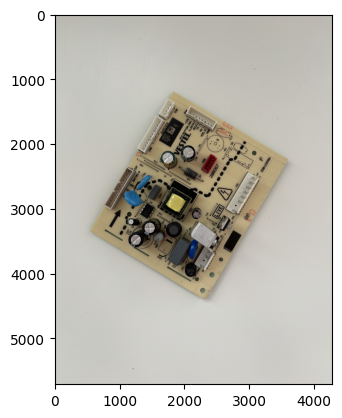

In [4]:
original_image = cv2.imread(ORIGINAL_IMG_DIR)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(original_image)

Text(0.5, 1.0, 'Reference Image')

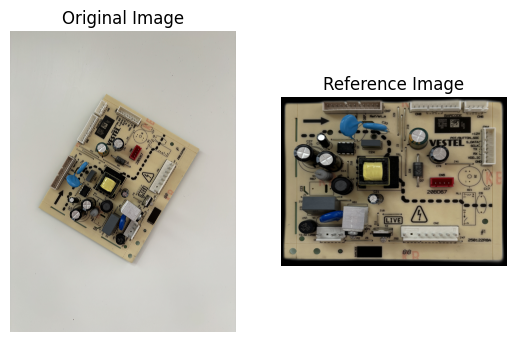

In [7]:
original_image = cv2.cvtColor(cv2.imread(ORIGINAL_IMG_DIR), cv2.COLOR_BGR2RGB)
reference_image = cv2.cvtColor(cv2.imread(REFERENCE_IMG_DIR), cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(reference_image, cmap='gray')
plt.axis('off')
plt.title('Reference Image')

In [8]:
def resize_image_with_aspect_ratio(image, width = None, height = None, inter = cv2.INTER_AREA):
    scl = 0
    (h, w) = image.shape[0], image.shape[1]

    if (width is None) and (height is None):
      raise ValueError("Please set a value for one of width or height parameters")
    elif height is None:
        # Calculate aspect ratio
        ratio = width / float(w)
        scl = (width, int(h * ratio))
    else:
        # Calculate aspect ratio
        ratio = height / float(h)
        scl = (int(w * ratio), height)

    # Resize the image
    resized = cv2.resize(image, scl, interpolation = inter)

    return resized

In [23]:
def visualize_feature_matching(org_img_file, ref_img_file):
  # Fit window (Large images do not fit in window for Colab)
  WINDOW_FIT_LIMIT = 1000
  REF_WINDOW_LIMIT = 1000

  # Load the images
  original_img = cv2.imread(org_img_file)
  reference_img = cv2.imread(ref_img_file)

  if reference_img.shape[1] > original_img.shape[1]:
    split_ratio = original_img.shape[1] // reference_img.shape[1]
    REF_WINDOW_LIMIT = WINDOW_FIT_LIMIT * split_ratio

  def fit_window(img, limit):
    if img.shape[1] >= limit:
      img = resize_image_with_aspect_ratio(img, width=limit)
    if img.shape[0] >= limit:
      img = resize_image_with_aspect_ratio(img, height=limit)
    return img

  # Rescale images for fitting the window
  original_img = fit_window(original_img, WINDOW_FIT_LIMIT)
  reference_img = fit_window(reference_img, REF_WINDOW_LIMIT)
  original_img_gray = fit_window(cv2.imread(org_img_file, cv2.IMREAD_GRAYSCALE), WINDOW_FIT_LIMIT)
  reference_img_gray = fit_window(cv2.imread(ref_img_file, cv2.IMREAD_GRAYSCALE), REF_WINDOW_LIMIT)

  # Initialize SIFT detector
  sift = cv2.SIFT_create()

  # Detect key points and compute descriptors
  kp1, dst1 = sift.detectAndCompute(original_img_gray, None)
  kp2, dst2 = sift.detectAndCompute(reference_img_gray, None)

  # Initialize the Brute-Force Matcher
  bf = cv2.BFMatcher()

  # Match descriptors
  matches = bf.knnMatch(dst1, dst2, k=2)

  # Apply ratio test
  good_matches = []
  for m, n in matches:
      if m.distance < 0.75 * n.distance:
          good_matches.append(m)

  # Draw matches
  matching_result = cv2.drawMatches(original_img, kp1, reference_img, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  cv2_imshow(matching_result)

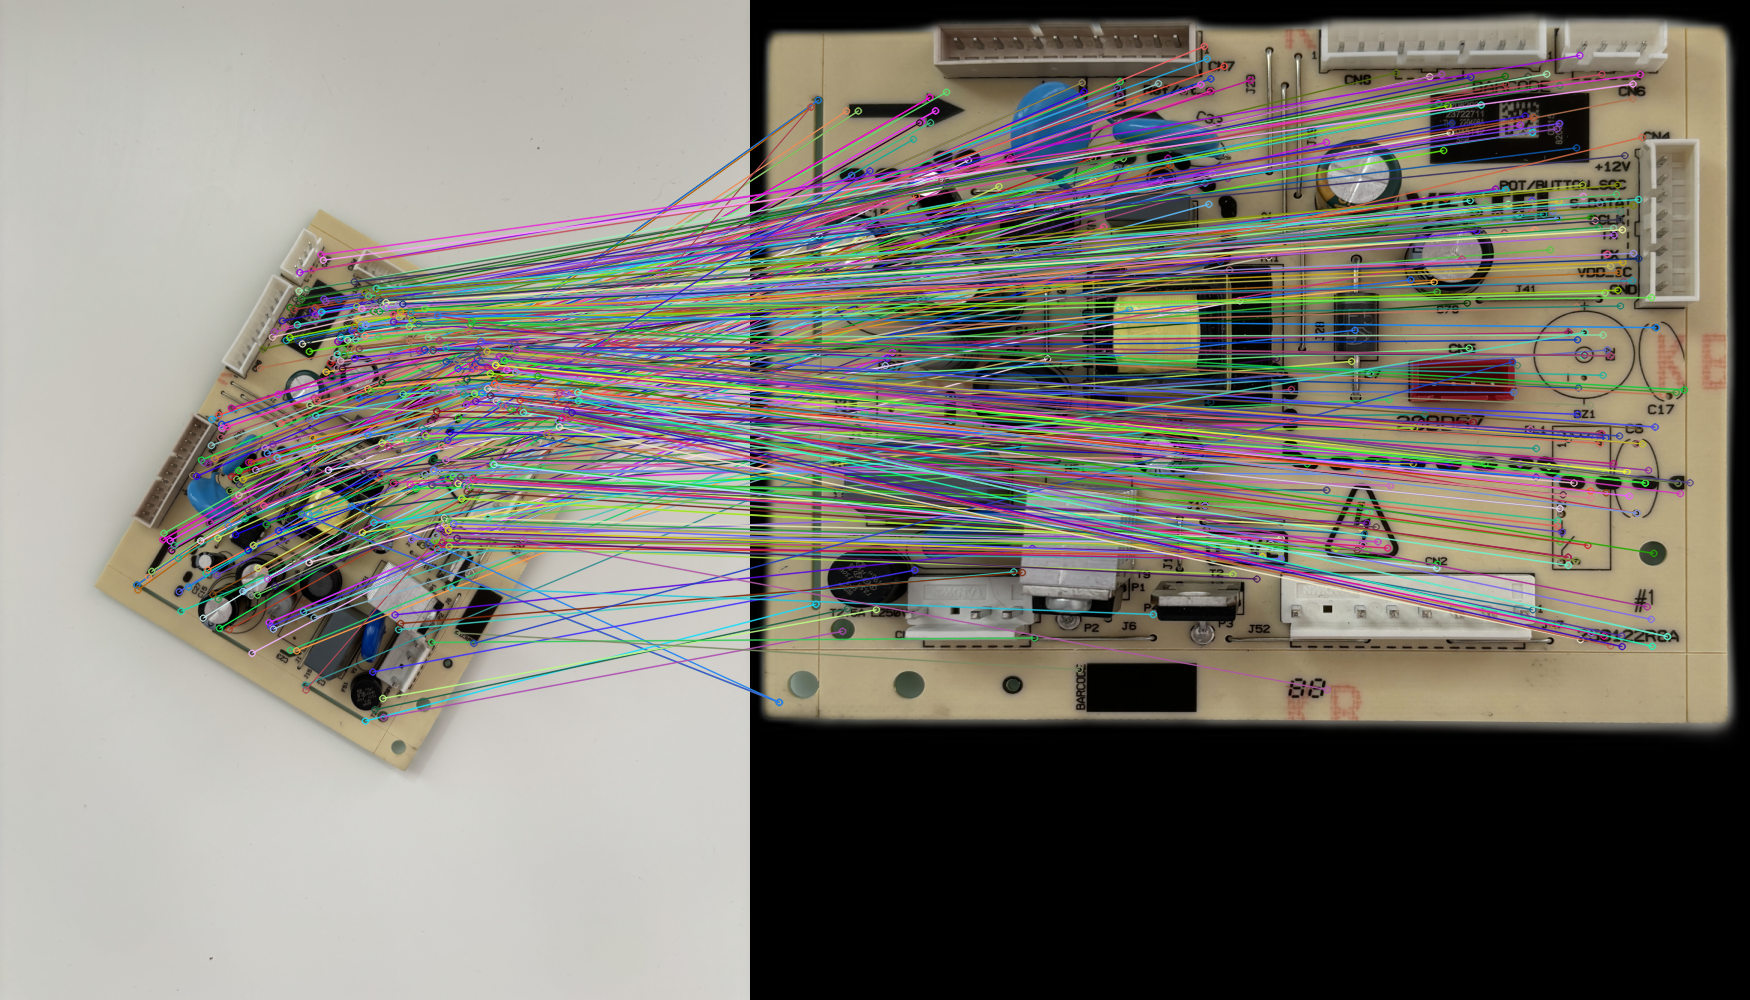

In [24]:
visualize_feature_matching(ORIGINAL_IMG_DIR, REFERENCE_IMG_DIR)

https://docs.opencv.org/3.4/d1/de0/tutorial_py_feature_homography.html

https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html